In [2]:
# uploading the dataset
from google.colab import files
uploaded = files.upload()

Saving Movie_Review_Dataset.csv to Movie_Review_Dataset (1).csv


In [61]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.metrics.distance  import edit_distance
from sklearn.feature_extraction.text import TfidfVectorizer 
import seaborn as sns
import re
from sklearn.model_selection import train_test_split as tts
from sklearn.naive_bayes import MultinomialNB 
from sklearn.naive_bayes import MultinomialNB as MNB,BernoulliNB as BNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [8]:
#importing the dataset
import io
data = pd.read_csv(io.BytesIO(uploaded[r"Movie_Review_Dataset.csv"]))
data.head()


,Review,Sentiment
0,films adapted from comic books have had plenty...,pos
1,every now and then a movie comes along from a ...,pos
2,you ' ve got mail works alot better than it de...,pos
3,""" jaws "" is a rare film that grabs your attent...",pos
4,moviemaking is a lot like being the general ma...,pos


In [82]:
#seeing the info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     2000 non-null   object
 1   Sentiment  2000 non-null   object
 2   Length     2000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 47.0+ KB


In [10]:
#seeing the description of the data
data.describe()

,Review,Sentiment
count,2000,2000
unique,2000,2
top,this independent film written and directed by ...,neg
freq,1,1000


In [11]:
#seeing the head of the data
data.head()

,Review,Sentiment
0,films adapted from comic books have had plenty...,pos
1,every now and then a movie comes along from a ...,pos
2,you ' ve got mail works alot better than it de...,pos
3,""" jaws "" is a rare film that grabs your attent...",pos
4,moviemaking is a lot like being the general ma...,pos


In [72]:
#creating a function to removing the noise from data
def removing_noise(text):
    text = text.lower()
    text = re.sub("<[^>]*>","",text)
    text = re.sub("[+-=/!@#$%\^&_\.?*,:;'\"\]\\\[{}()]","",text)
    return text

data.Review = data.Review.apply(removing_noise)

In [13]:
#creating function to stem words 
def Stem(text):
    text = text.lower()
    PS = PorterStemmer()
    text = " ".join([PS.stem(word) for word in text.split()])
    return text

data.Review = data.Review.apply(Stem)

In [17]:
#creating a function to remove stop words
import nltk
nltk.download('stopwords')
nltk.download('punkt')
def remove_stop_words(text):
    stop_words_list = stopwords.words('english')
    tokens = word_tokenize(text)
    filtered_word = [token for token in tokens if token not in stop_words_list or len(token)>2]
    return " ".join(filtered_word)

data.Review = data.Review.apply(remove_stop_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


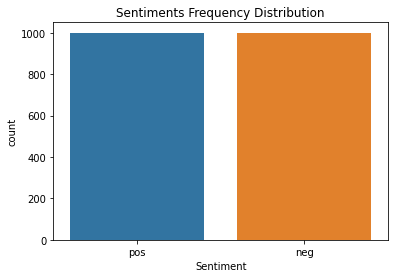

In [33]:
#Making a count plot of positive and negative sentiment
sns.countplot(x = 'Sentiment', data = data)
plt.title("Sentiments Frequency Distribution")
plt.show()

In [80]:
#defining a function to plot word frequency
def word_frequency(words, title, top_n=10):
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    plt.title(title)
    plot = sns.barplot(labels, counts)
    return plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


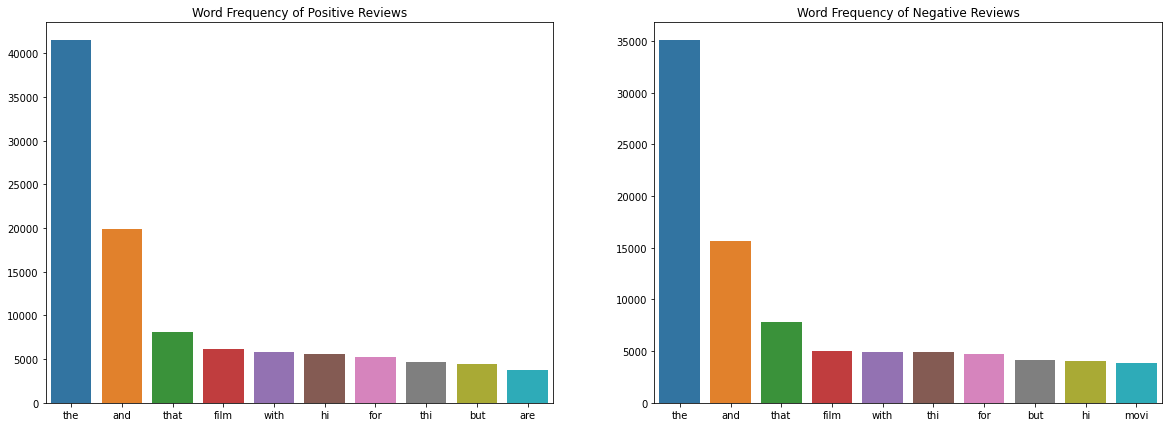

In [81]:
# creating a list of positive and negative words 
positive_words = [word for text in data.Review[data.Sentiment == "pos"] for word in word_tokenize(text)]
negative_words = [word for text in data.Review[data.Sentiment == "neg"] for word in word_tokenize(text)]

#ploting frequency of top 10 words in positive and negative reviews
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
word_frequency(positive_words, "Word Frequency of Positive Reviews")
plt.subplot(1,2,2)
word_frequency(negative_words, "Word Frequency of Negative Reviews")


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


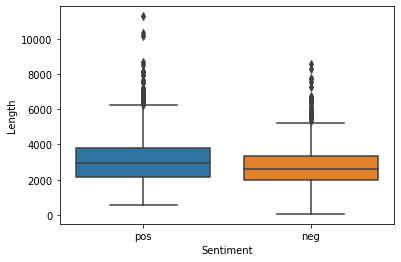

In [56]:
#ploting box plot of of length of review
data['Length'] = data.Review.apply(lambda x: len(x))
sns.boxplot(data.Sentiment, data.Length)

In [57]:
tf_vect=TfidfVectorizer()
tf_vect_reviews=tf_vect.fit_transform(data.Review)
print(tf_vect_reviews)

  (0, 4455)	0.03798778659158295
  (0, 6314)	0.03276339323180603
  (0, 12375)	0.03549360734182908
  (0, 19782)	0.030050189223688493
  (0, 9063)	0.03787801342218802
  (0, 10388)	0.01915599885681874
  (0, 1395)	0.017611325608557295
  (0, 9536)	0.023819014152493344
  (0, 168)	0.01901898904857198
  (0, 11256)	0.04709396916807698
  (0, 1183)	0.022650250282744845
  (0, 10685)	0.028224525763293134
  (0, 14639)	0.03327373532033825
  (0, 9972)	0.028542602547496507
  (0, 15655)	0.020901499816131066
  (0, 19885)	0.0157076562768033
  (0, 4811)	0.04679701877496121
  (0, 2008)	0.01916981453545854
  (0, 18749)	0.018138553470910587
  (0, 21730)	0.02518811690217275
  (0, 9195)	0.018426871299997743
  (0, 12951)	0.05906402214471621
  (0, 5093)	0.05704319496179094
  (0, 18552)	0.049114796351002264
  (0, 19586)	0.030521971704389778
  :	:
  (1999, 12885)	0.015977127052290017
  (1999, 14076)	0.02681856866849587
  (1999, 25040)	0.04229671678345432
  (1999, 19265)	0.017254094179722033
  (1999, 19720)	0.02546264

In [58]:
#creating a dataframe of tf-idf model
pd.DataFrame(tf_vect_reviews.toarray(), columns = tf_vect.get_feature_names()).head()

,aa,aaa,aaaaaaaaah,aaaaaaaahhhh,aaaaaah,aaaahhh,aah,aaliyah,aalyah,aamir,aardman,aaron,aatish,ab,aback,abandon,abat,abb,abba,abber,abberlin,abbi,abbot,abbott,abbrevi,abc,abdomen,abduct,abducte,abdul,abe,abel,aberdeen,aberr,abet,abey,abhorr,abid,abigail,abiil,...,zimmer,zimmerli,zimmerman,zinger,zinnemman,zinnia,zip,zippel,zipper,zippi,zit,ziyi,zodiac,zoe,zombi,zombifi,zone,zoo,zookeep,zooland,zoologist,zoom,zoot,zophr,zorg,zorro,zsigmond,zu,zucker,zuehlk,zuko,zukovski,zulu,zundel,zurg,zweibel,zwick,zwigoff,zyci,zzzzzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.143237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
#spliting dataset 
train_X,test_X,train_y,test_y = tts(tf_vect_reviews,data.Sentiment, random_state = 0)

In [70]:
# Bernoulli Naive Bayes Model
BNB_model = BNB().fit(train_X,train_y)  
y_pred_2 = BNB_model.predict(test_X)

print(f"Model 2 accuracy : {accuracy_score(test_y,y_pred_2)}")

Model 2 accuracy : 0.768


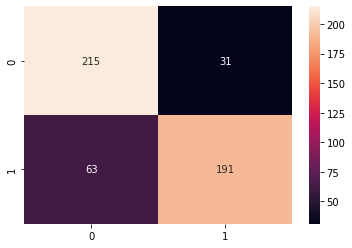

In [71]:
#Ploting Confusion Matrix
matrix1 = confusion_matrix(test_y, y_pred)
sns.heatmap(confusion_matrix(test_y, y_pred),annot=True,fmt="g")